In [1]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plotFunction(data, title):
    # Fixing random state for reproducibility
    np.random.seed(19680801)
    plt.rcdefaults()
    fig, ax = plt.subplots()

    # Example data
    ax.barh(data.index, data.values, align='center')
    ax.set_yticks(data.index)
    ax.set_yticklabels(data.index)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Number of Dataset')
    ax.set_title(title)

    for i, v in enumerate(data.values):
        ax.text(v + 0.5, i +0.05, str(v), color='black', fontweight='bold')
    plt.show()
    
results_dir = "./results/mse_13102021_ES/"
results_list = sorted(os.listdir(results_dir))[1:]
merged_results = None
count = -1

with open('valacc.mse.txt') as f:
    lines = ([line.replace('\n', '').split(' ')[3:6:2] for line in f.readlines()[5:] if line.strip('\n')])

for line in lines:
    count = count + 1 if count < 2 else 0
    fn = line[0].split('/')[2].split('.')
    fn = f"mse_{fn[1].split('=')[-1]}_{fn[2].split('=')[-1]}_{fn[3].split('=')[-1]}_{fn[4].split('s')[-1]}_{fn[5].split('n')[-1]}_{fn[6]}.csv"
    resultpath = results_dir + fn
    result = pd.read_csv(resultpath, index_col=0)
    result.loc[f'default_acc_{count}'] = round(float(line[1]),5)
    result.to_csv(resultpath, index=True)

for results_item in results_list:
    resultpath = results_dir + results_item
    result = pd.read_csv(resultpath, index_col=0)
    rerun_avg = sum([float(result.loc['rerun_acc_0'].values[0]), float(result.loc['rerun_acc_1'].values[0]), float(result.loc['rerun_acc_2'].values[0])])/3.0
    default_avg = sum([float(result.loc['default_acc_0'].values[0]), float(result.loc['default_acc_1'].values[0]), float(result.loc['default_acc_2'].values[0])])/3.0
    delta = (rerun_avg - default_avg)
    if delta > 0.01:
        delta_bool = 'better'
    elif delta < -0.01:
        delta_bool = 'worse'
    else:
        delta_bool = 'same'
        
    result.loc[f'delta'] = round(delta,6)
    result.loc[f'isbetter'] = delta_bool
    result.to_csv(resultpath, index=True)
    
for results_item in results_list:
    resultpath = results_dir + results_item
    result = pd.read_csv(resultpath, index_col=0)
    merged_results = result if merged_results is None else pd.concat([merged_results, result], axis=1)

merged_results = merged_results.drop(index='tuner/trial_id')
merged_results.to_csv(results_dir+'mse_13102021_ES_mergedresult.csv', index=True)

af_LSTM_pd = merged_results.T.groupby(['af_LSTM']).count()['dataset_no'].sort_values(ascending=False)
raf_LSTM_pd = merged_results.T.groupby(['raf_LSTM']).count()['dataset_no'].sort_values(ascending=False)
af_dense_pd = merged_results.T.groupby(['af_dense']).count()['dataset_no'].sort_values(ascending=False)
optimizer_pd = merged_results.T.groupby(['optimizer']).count()['dataset_no'].sort_values(ascending=False)
learningrate_pd = merged_results.T.groupby(['learning_rate']).count()['dataset_no'].sort_values(ascending=False)
epoch_pd = merged_results.T.groupby(['tuner/epochs']).count()['dataset_no'].sort_values(ascending=False)
isbetter_pd = merged_results.T.groupby(['isbetter']).count()['dataset_no'].sort_values(ascending=False)

print(f'The most occurrred items for hyperparameters are:')
print(f"++ LSTM activation function: \033[1m{af_LSTM_pd.index[0]}\033[0m with \033[1m{af_LSTM_pd[0]}\033[0m/180")
print(f'++ LSTM Recurrent activation function: \033[1m{raf_LSTM_pd.index[0]}\033[0m with \033[1m{raf_LSTM_pd[0]}\033[0m/180')
print(f'++ Dense activation function: \033[1m{af_dense_pd.index[0]}\033[0m with \033[1m{af_dense_pd[0]}\033[0m/180')
print(f'++ Optimizer: \033[1m{optimizer_pd.index[0]}\033[0m with \033[1m{optimizer_pd[0]}\033[0m/180')
print(f'++ Learning Rate: \033[1m{learningrate_pd.index[0]}\033[0m with \033[1m{learningrate_pd[0]}\033[0m/180')
print(f'++ Number of Epoch: \033[1m{epoch_pd.index[0]}\033[0m with \033[1m{epoch_pd[0]}\033[0m/180')
print(f'++ Number of isBetter: \033[1m{isbetter_pd.index[0]}\033[0m with \033[1m{isbetter_pd[0]}\033[0m/180')

The most occurrred items for hyperparameters are:
++ LSTM activation function: tanh with 288/180
++ LSTM Recurrent activation function: sigmoid with 360/180
++ Dense activation function: tanh with 324/180
++ Optimizer: adam with 318/180
++ Learning Rate: 0.01 with 288/180
++ Number of Epoch: 8 with 310/180
++ Number of isBetter: same with 271/180


In [11]:
results_dir = "./results/mse_13102021_ES/"
results_list = sorted(os.listdir(results_dir))[1:]
merged_results = None
count = -1

for results_item in results_list:
    resultpath = results_dir + results_item
    result = pd.read_csv(resultpath, index_col=0)
    delta = float(result.loc['delta'].values[0])
    if delta > 0.01:
        delta_bool = 'better'
    elif delta < -0.01:
        delta_bool = 'worse'
    else:
        delta_bool = 'same'
        
    result.loc[f'isbetter'] = delta_bool
    result.to_csv(resultpath, index=True)
    merged_results = result if merged_results is None else pd.concat([merged_results, result], axis=1)

merged_results = merged_results.drop(index='tuner/trial_id')
merged_results.to_csv(results_dir+'mse_13102021_ES_mergedresult.csv', index=True)

In [15]:
af_LSTM_pd = merged_results.T.groupby(['af_LSTM']).count()['dataset_no'].sort_values(ascending=False)
raf_LSTM_pd = merged_results.T.groupby(['raf_LSTM']).count()['dataset_no'].sort_values(ascending=False)
af_dense_pd = merged_results.T.groupby(['af_dense']).count()['dataset_no'].sort_values(ascending=False)
optimizer_pd = merged_results.T.groupby(['optimizer']).count()['dataset_no'].sort_values(ascending=False)
learningrate_pd = merged_results.T.groupby(['learning_rate']).count()['dataset_no'].sort_values(ascending=False)
epoch_pd = merged_results.T.groupby(['tuner/epochs']).count()['dataset_no'].sort_values(ascending=False)
isbetter_pd = merged_results.T.groupby(['isbetter']).count()['dataset_no'].sort_values(ascending=False)

print(f'The most occurrred items for hyperparameters are:')
print(f"++ LSTM activation function: \033[1m{af_LSTM_pd.index[0]}\033[0m with \033[1m{af_LSTM_pd[0]}\033[0m/180")
print(f'++ LSTM Recurrent activation function: \033[1m{raf_LSTM_pd.index[0]}\033[0m with \033[1m{raf_LSTM_pd[0]}\033[0m/180')
print(f'++ Dense activation function: \033[1m{af_dense_pd.index[0]}\033[0m with \033[1m{af_dense_pd[0]}\033[0m/180')
print(f'++ Optimizer: \033[1m{optimizer_pd.index[0]}\033[0m with \033[1m{optimizer_pd[0]}\033[0m/180')
print(f'++ Learning Rate: \033[1m{learningrate_pd.index[0]}\033[0m with \033[1m{learningrate_pd[0]}\033[0m/180')
print(f'++ Number of Epoch: \033[1m{epoch_pd.index[0]}\033[0m with \033[1m{epoch_pd[0]}\033[0m/180')
print(f'++ Number of isBetter: \033[1m{isbetter_pd.index[0]}\033[0m with \033[1m{isbetter_pd[0]}\033[0m/180')
print(f'++ Number of isBetter: \033[1m{isbetter_pd.index[1]}\033[0m with \033[1m{isbetter_pd[1]}\033[0m/180')
print(f'++ Number of isBetter: \033[1m{isbetter_pd.index[2]}\033[0m with \033[1m{isbetter_pd[2]}\033[0m/180')

The most occurrred items for hyperparameters are:
++ LSTM activation function: tanh with 144/180
++ LSTM Recurrent activation function: sigmoid with 180/180
++ Dense activation function: tanh with 162/180
++ Optimizer: adam with 159/180
++ Learning Rate: 0.01 with 144/180
++ Number of Epoch: 8 with 155/180
++ Number of isBetter: same with 91/180
++ Number of isBetter: better with 78/180
++ Number of isBetter: worse with 11/180


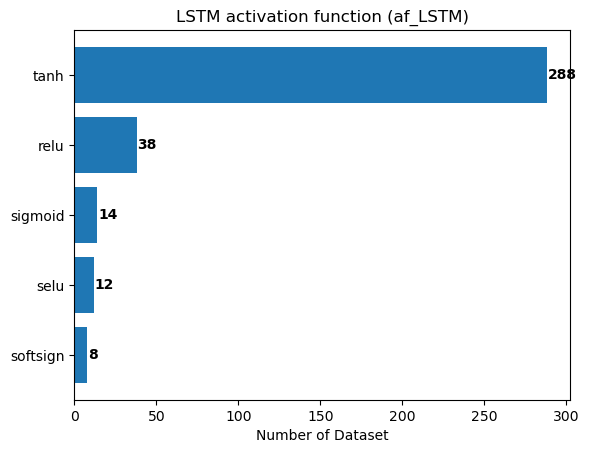

In [2]:
plotFunction(af_LSTM_pd, 'LSTM activation function (af_LSTM)')

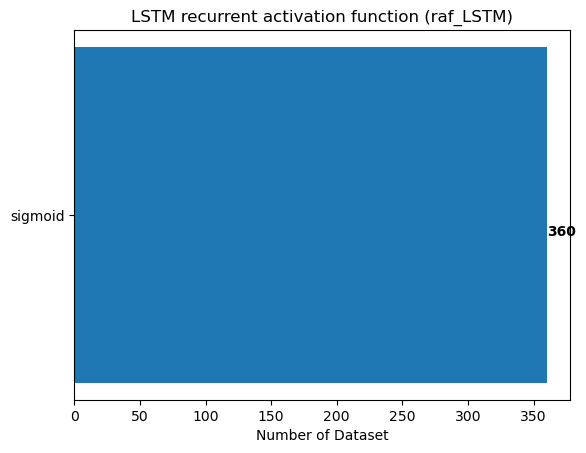

In [3]:
plotFunction(raf_LSTM_pd, 'LSTM recurrent activation function (raf_LSTM)')

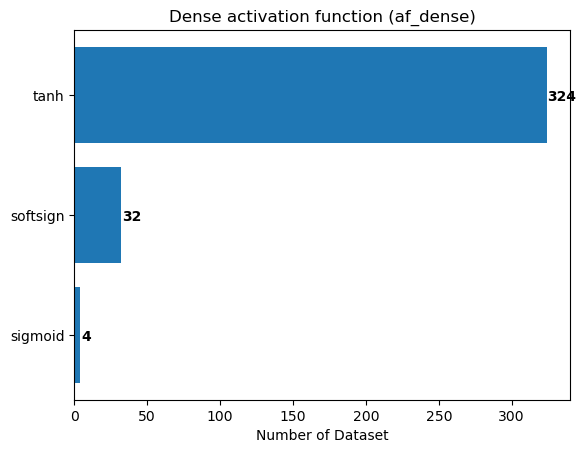

In [4]:
plotFunction(af_dense_pd, 'Dense activation function (af_dense)')

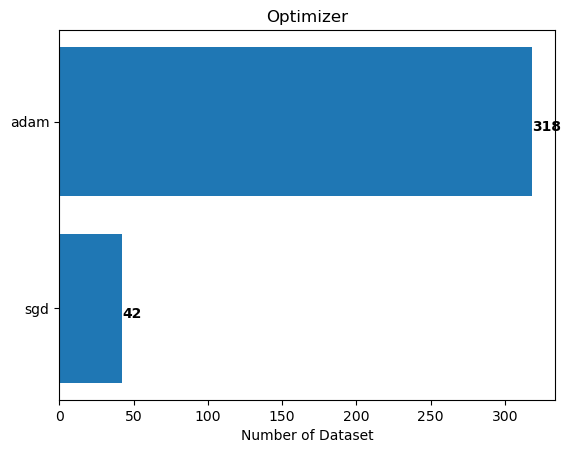

In [5]:
plotFunction(optimizer_pd, 'Optimizer')

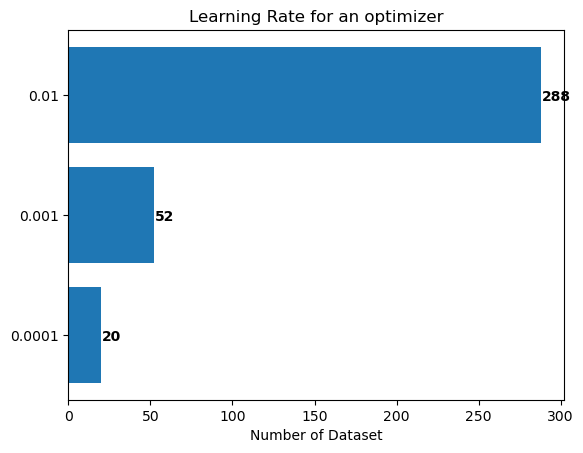

In [6]:
plotFunction(learningrate_pd, 'Learning Rate for an optimizer')

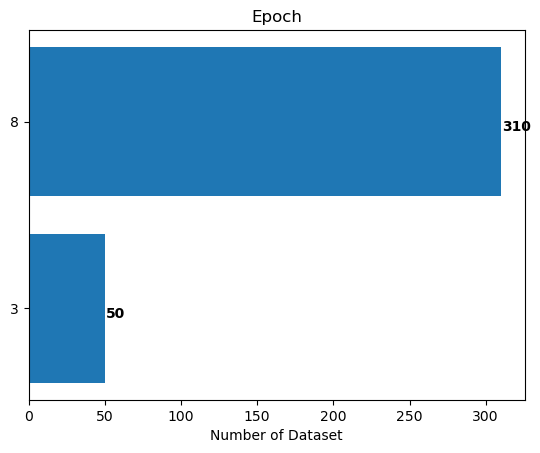

In [7]:
plotFunction(epoch_pd, 'Epoch')